In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Data Analysis

#-->  Asking the right question
#-->  Data Preprocessing
#-->  EDA(Exploratory Data Analysis)


#Apply Machine Learning

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [8]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# 2.Data Preprocessing

#Cabin column train

train['Cabin'].fillna(0,inplace=True)   #fillna fills the missing values

In [10]:
def transform_cabin(cabin):
    if cabin!=0:
        return 1
    else:
        return 0

In [11]:
train['Cabin']=train['Cabin'].apply(transform_cabin)

In [12]:
train['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [13]:
test['Cabin'].fillna(0,inplace=True)
test['Cabin']=test['Cabin'].apply(transform_cabin)

In [14]:
test['Cabin'].value_counts()

0    327
1     91
Name: Cabin, dtype: int64

In [15]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [16]:
train.isnull().sum()  #To check the missing values. Filling the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [17]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train['Embarked'].fillna('S',inplace=True)

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [20]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [21]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [22]:
#Random numbers in the range of mean-std and mean+std

#Generate 177 random age values


In [23]:
train_random_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),size=177)

In [24]:
train['Age'][train['Age'].isnull()]=train_random_age

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
test_random_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),size=86)

In [27]:
test['Age'][test['Age'].isnull()]=test_random_age  #Passing

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:
# 3.EDA


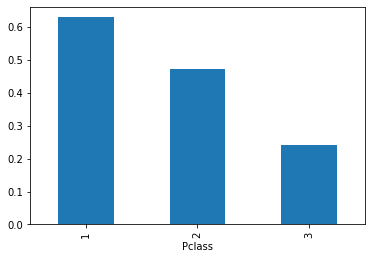

In [30]:
train.groupby('Pclass').mean()['Survived'].plot(kind='bar')  #Survival chance acc to Pclass in %

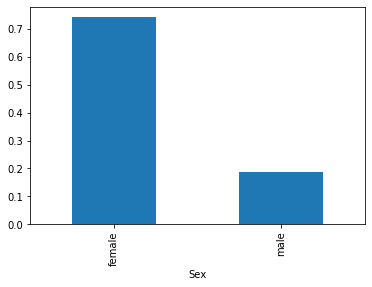

In [31]:
train.groupby('Sex').mean()['Survived'].plot(kind='bar')

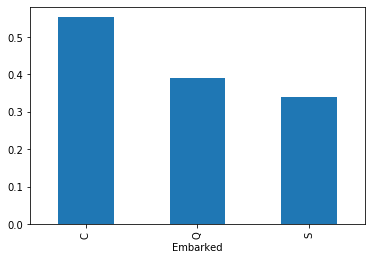

In [32]:
train.groupby('Embarked').mean()['Survived'].plot(kind='bar')

In [33]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [34]:
train['family']=train['SibSp']+train['Parch']+1

In [35]:
test['family']=test['SibSp']+test['Parch']+1

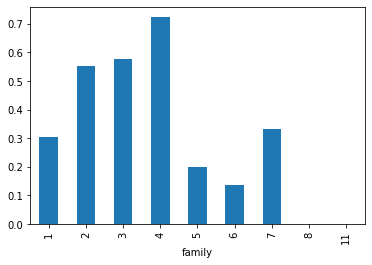

In [36]:
train.groupby('family').mean()['Survived'].plot(kind='bar')

In [37]:
def family_type(number):
    if number==1:
        return "Alone"
    elif number>1 and number<=4:
        return "Small"
    else:
        return "Large"
        

In [38]:
train['Family_type']=train['family'].apply(family_type)

In [39]:
test['Family_type']=test['family'].apply(family_type)

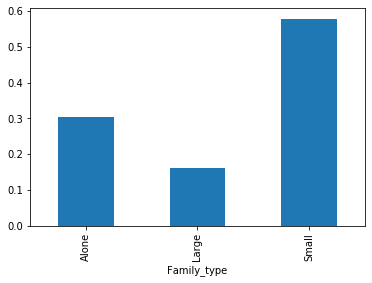

In [40]:
train.groupby('Family_type').mean()['Survived'].plot(kind='bar')

In [41]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)                    

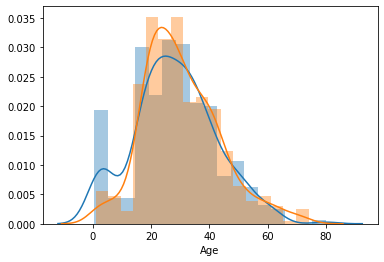

In [42]:
sns.distplot(train[train['Survived']==1]['Age'])
sns.distplot(train[train['Survived']==0]['Age'])

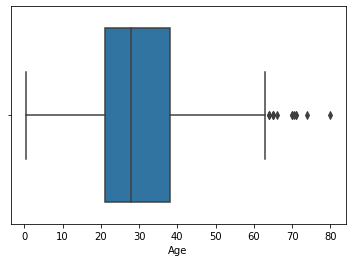

In [43]:
sns.boxplot(train['Age'])

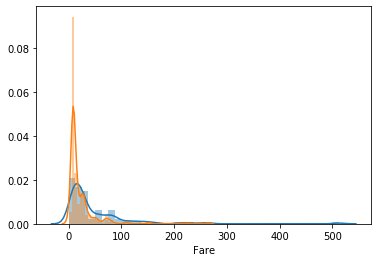

In [44]:
sns.distplot(train[train['Survived']==1]['Fare'])
sns.distplot(train[train['Survived']==0]['Fare'])

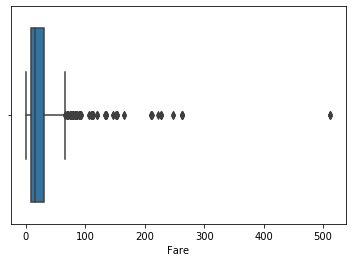

In [45]:
sns.boxplot(train['Fare'])

In [46]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [47]:
passenger_id=test['PassengerId'].values

In [48]:
train.drop(columns=['PassengerId'],inplace=True)
test.drop(columns=['PassengerId'],inplace=True)

In [49]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Cabin','Embarked','Family_type'],drop_first=True)

In [50]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Cabin','Embarked','Family_type'],drop_first=True)

In [51]:
test.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_1,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Small
0,34.5,7.8292,0,1,1,0,1,0,0,0
1,47.0,7.0000,0,1,0,0,0,1,0,1
2,62.0,9.6875,1,0,1,0,1,0,0,0
3,27.0,8.6625,0,1,1,0,0,1,0,0
4,22.0,12.2875,0,1,0,0,0,1,0,1


In [52]:
train.corr()['Survived']  #-ve means inversly proportional

Survived             1.000000
Age                 -0.076728
Fare                 0.257307
Pclass_2             0.093349
Pclass_3            -0.322308
Sex_male            -0.543351
Cabin_1              0.316912
Embarked_Q           0.003650
Embarked_S          -0.149683
Family_type_Large   -0.125147
Family_type_Small    0.279855
Name: Survived, dtype: float64

In [53]:
#Decision Tree Method

In [54]:
X=train.iloc[:,1:].values  #X and y extract

In [55]:
y=train.iloc[:,0].values

In [56]:
#train test split

from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
#Train the model

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [59]:
#for i in range(1,25):
    #clf=DecisionTreeClassifier(max_depth=i)
    #clf.fit(X_train,y_train)
    #y_pred=clf.predict(X_test)
    #print(accuracy_score(y_test,y_pred))

NameError: name 'accuracy_score' is not defined

In [60]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
y_pred=clf.predict(X_test)

In [62]:
#Accuracy calculate

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.776536312849162

In [63]:
x_final=test.iloc[:,:].values

In [64]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_final=clf.predict(x_final)

In [65]:
y_final.shape

(418,)

In [66]:
passenger_id.shape

(418,)

In [67]:
new=pd.DataFrame()  #Creating new dataframe

In [68]:
new

""


In [69]:
new['PassengerId']=passenger_id
new['Survived']=y_final

In [70]:
new

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [71]:
new.to_csv('submission.csv',index=False)  # making a csv file